# **DIABETIC RETINOPATHY DETECTION**

### This project uses the following notebooks used to create the models detecting the retina disease in diabetic patients.

1. 1_CNN_Model_Baseline.ipynb (current) - testing on small subset of images across 5 different stages
2. 2_CNN_Model.ipynb - binary classification of final dataset, created baseline and second iteration 
3. 3_TL_MobileNet_Model.ipynb - binary classification of final dataset using transfer learning with MobileNet V2 model
4. 4_Yolov5_Model.ipynb - further experimentation to detect multiclassification on different stages of diabetic retinopathy as next steps.


### 1_CNN_Model (current)

In this notebook, took around 3000 images in total to run a basic CNN model. The images had 5 labels with NoDR (No diabetic retinopathy), Mild, Moderate, Severe and Proliferative

## Imports

In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Mount Drive and validate image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Gather all the images data and convert to array to build X

In [ ]:
dr_mild_array = []
# define filepath for Mild
dr_mild_path = '/content/drive/MyDrive/Colab Notebooks/Capstone/train_images/1/'
# convert each image to normalized array and store
for file in os.listdir(dr_mild_path):
    try:
        # target_size automatically resizes each img on import
        mild = load_img(dr_mild_path + file, target_size=(244, 244))
        dr_mild = img_to_array(mild) / 243
        dr_mild_array.append(dr_mild)
    except:
        print(f'Error for file: {file}')
print(f'{len(dr_mild_array)} pictures converted.')

972 pictures converted.


In [ ]:
dr_mod_array = []
# define filepath for Dog class
dr_mod_path = '/content/drive/MyDrive/Colab Notebooks/Capstone/train_images/2/'
# convert each image to normalized array and store
for file in os.listdir(dr_mod_path):
    try:
        # target_size automatically resizes each img on import
        mod = load_img(dr_mod_path + file, target_size=(244, 244))
        dr_mod = img_to_array(mod) / 243
        dr_mod_array.append(dr_mod)
    except:
        print(f'Error for file: {file}')
print(f'{len(dr_mod_array)} pictures converted.')

1524 pictures converted.


In [ ]:
dr_nodr_array = []
# define filepath for No DR
dr_nodr_path = '/content/drive/MyDrive/Colab Notebooks/Capstone/train_images/0/'
# convert each image to normalized array and store
for file in os.listdir(dr_nodr_path):
    try:
        # target_size automatically resizes each img on import
        nodr = load_img(dr_nodr_path + file, target_size=(244, 244))
        dr_nodr = img_to_array(nodr) / 243
        dr_nodr_array.append(dr_nodr)
    except:
        print(f'Error for file: {file}')
print(f'{len(dr_nodr_array)} pictures converted.')
#noDR

2793 pictures converted.


In [ ]:
dr_prdr_array = []
# define filepath for Proliferated DR
dr_prdr_path = '/content/drive/MyDrive/Colab Notebooks/Capstone/train_images/4/'
# convert each image to normalized array and store
for file in os.listdir(dr_prdr_path):
    try:
        # target_size automatically resizes each img on import
        prdr = load_img(dr_prdr_path + file, target_size=(244, 244))
        dr_prdr = img_to_array(prdr) / 243
        dr_prdr_array.append(dr_prdr)
    except:
        print(f'Error for file: {file}')
print(f'{len(dr_prdr_array)} pictures converted.')
#Proliferate_DR

652 pictures converted.


In [ ]:
dr_sev_array = []
# define filepath for Severe DR
dr_sev_path = '/content/drive/MyDrive/Colab Notebooks/Capstone/train_images/3/'
# convert each image to normalized array and store
for file in os.listdir(dr_sev_path):
    try:
        # target_size automatically resizes each img on import
        sev = load_img(dr_sev_path + file, target_size=(244, 244))
        dr_sev = img_to_array(sev) / 243
        dr_sev_array.append(dr_sev)
    except:
        print(f'Error for file: {file}')
print(f'{len(dr_sev_array)} pictures converted.')
#severe

615 pictures converted.


## Build X and y

In [ ]:
# X should contain all the images
X = dr_nodr_array + dr_mild_array + dr_mod_array + dr_sev_array + dr_prdr_array


In [ ]:
# convert to array and check shape
X = np.array(X)
print(f'X shape: {X.shape}')

y = [0] * 2793 + [1] * 972 + [2] * 1524 + [3] * 615 + [4] * 652
# convert to array and check shape
y = np.array(y)
print(f'y shape: {y.shape}')

X shape: (6556, 244, 244, 3)
y shape: (6556,)


## Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size=0.25,
                                                    random_state=42)

In [ ]:
X_train = np.array(X_train)
X_train[0].shape

(244, 244, 3)

In [ ]:
X_test = np.array(X_test)
X_test[0].shape

(244, 244, 3)

In [ ]:
y_train.shape

(4917,)

In [ ]:
y_test.shape

(1639,)

In [ ]:
#convert y_train to the the number of classes.
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train, 5)
y_test = tf.keras.utils.to_categorical(y_test, 5)

## Model 2 - CNN

In [ ]:
INPUT_SHAPE = (244,244,3)

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape = INPUT_SHAPE))
model.add(MaxPooling2D( (2,2) ) )

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D( (2,2) ) )

model.add(Flatten())
model.add(Dense(32, activation ='relu'))

model.add(Dense(5, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 242, 242, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 121, 121, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 119, 119, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 111392)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                3564576   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1

In [ ]:
results = model.fit(np.asarray(X_train), np.asarray(y_train),
                    epochs = 200,
                    batch_size=32,
                    validation_data = (X_test, y_test))

Epoch 1/200
49/49 [==============================] - 18s 44ms/step - loss: 1.8825 - acc: 0.4026 - val_loss: 1.1653 - val_acc: 0.5627
Epoch 2/200
49/49 [==============================] - 1s 28ms/step - loss: 1.0993 - acc: 0.6011 - val_loss: 1.1652 - val_acc: 0.5687
Epoch 3/200
49/49 [==============================] - 1s 29ms/step - loss: 1.0495 - acc: 0.5910 - val_loss: 1.1011 - val_acc: 0.5791
Epoch 4/200
49/49 [==============================] - 1s 28ms/step - loss: 0.9958 - acc: 0.6091 - val_loss: 1.0897 - val_acc: 0.5955
Epoch 5/200
49/49 [==============================] - 1s 28ms/step - loss: 0.9653 - acc: 0.6261 - val_loss: 1.0671 - val_acc: 0.5881
Epoch 6/200
49/49 [==============================] - 1s 28ms/step - loss: 0.9081 - acc: 0.6445 - val_loss: 1.0766 - val_acc: 0.5836
Epoch 7/200
49/49 [==============================] - 1s 28ms/step - loss: 0.8382 - acc: 0.6926 - val_loss: 1.2027 - val_acc: 0.5896
Epoch 8/200
49/49 [==============================] - 1s 28ms/step - loss: 0

In [ ]:
model.evaluate(X_test, y_test)

21/21 [==============================] - 0s 12ms/step - loss: 2.4236 - acc: 0.5597


[2.42360520362854, 0.5597015023231506]

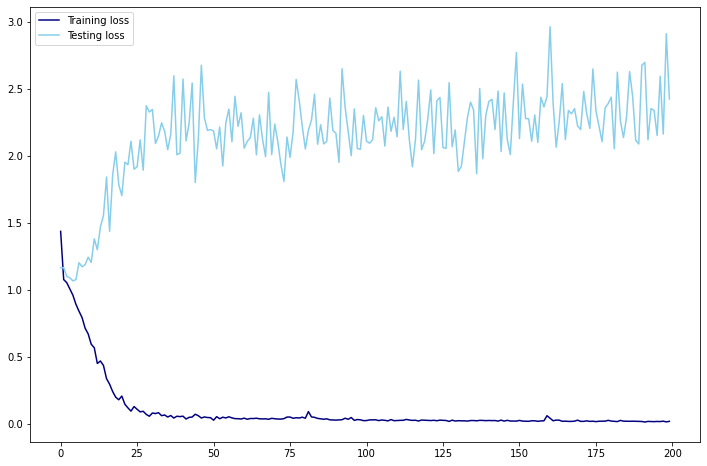

In [ ]:
# Visualize the loss
train_loss = results.history['loss']
test_loss =  results.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

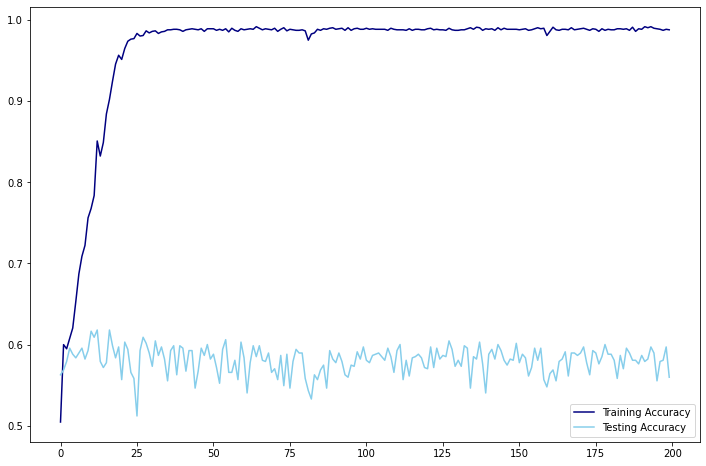

In [ ]:
train_acc = results.history['acc']
test_acc =  results.history['val_acc']

plt.figure(figsize=(12, 8))
plt.plot(train_acc, label='Training Accuracy', color='navy')
plt.plot(test_acc, label='Testing Accuracy', color='skyblue')
plt.legend();

In [ ]:
# model.save('/content/drive/MyDrive/Colab Notebooks/Capstone/model1_conv')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Capstone/model1_conv/assets


## Model 3 - CNN

In [ ]:
INPUT_SHAPE = (244,244,3)

model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape = INPUT_SHAPE))
model.add(MaxPooling2D( (2,2) ) )

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D( (2,2) ) )

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D( (2,2) ) )
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D( (2,2) ) )
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D( (2,2) ) )

model.add(Flatten())
model.add(Dense(1024, activation ='relu'))

model.add(Dense(5, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 242, 242, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 121, 121, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 119, 119, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 57, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0

In [ ]:
results3 = model.fit(X_train, y_train,
                    epochs = 500,
                    batch_size=64,
                    validation_data = (X_test, y_test))

Epoch 1/500
77/77 [==============================] - 3s 39ms/step - loss: 1.3431 - acc: 0.4425 - val_loss: 1.3893 - val_acc: 0.4338
Epoch 2/500
77/77 [==============================] - 3s 38ms/step - loss: 1.3382 - acc: 0.4545 - val_loss: 1.3636 - val_acc: 0.4387
Epoch 3/500
77/77 [==============================] - 3s 39ms/step - loss: 1.3283 - acc: 0.4519 - val_loss: 1.3584 - val_acc: 0.4454
Epoch 4/500
77/77 [==============================] - 3s 38ms/step - loss: 1.3216 - acc: 0.4570 - val_loss: 1.3595 - val_acc: 0.4509
Epoch 5/500
77/77 [==============================] - 3s 39ms/step - loss: 1.3119 - acc: 0.4580 - val_loss: 1.3562 - val_acc: 0.4436
Epoch 6/500
77/77 [==============================] - 3s 38ms/step - loss: 1.3013 - acc: 0.4582 - val_loss: 1.3446 - val_acc: 0.4613
Epoch 7/500
77/77 [==============================] - 3s 38ms/step - loss: 1.2863 - acc: 0.4698 - val_loss: 1.3374 - val_acc: 0.4570
Epoch 8/500
77/77 [==============================] - 3s 38ms/step - loss: 1.

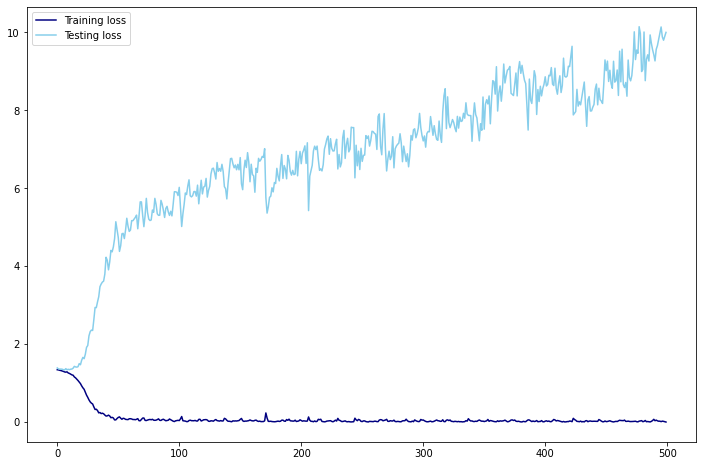

In [ ]:
# Visualize the loss
train_loss = results3.history['loss']
test_loss =  results3.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

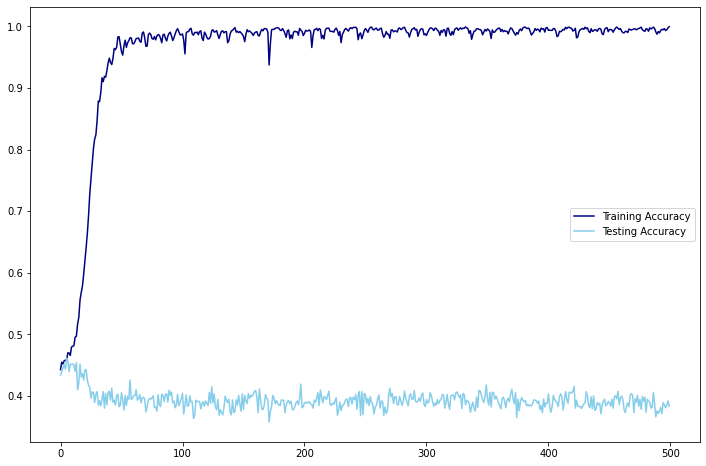

In [ ]:
train_acc = results3.history['acc']
test_acc =  results3.history['val_acc']

plt.figure(figsize=(12, 8))
plt.plot(train_acc, label='Training Accuracy', color='navy')
plt.plot(test_acc, label='Testing Accuracy', color='skyblue')
plt.legend();

In [ ]:
model.evaluate(X_test, y_test)

52/52 [==============================] - 1s 13ms/step - loss: 9.9996 - acc: 0.3832


[9.99958324432373, 0.38316047191619873]

### Summary

Test Basic CNN model with different dataset sizes, all of them were overfit and did not perform well. In next CNN model, want to add more images and setup binary classification.

Even though few training accuracy shown above was higher than 70%, it performed poorly on test accuracy of 38%.